In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from random import shuffle

dataset = load_boston()
shuffle(dataset.data)
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

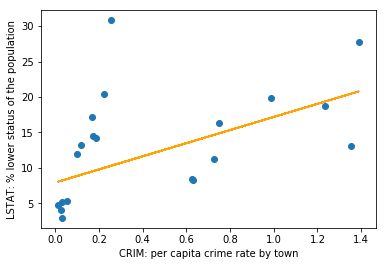

In [2]:
X_train, X_test, y_train, y_test = train_test_split(df['CRIM'].values[:100], df['LSTAT'].values[:100], test_size=.2)

plt.scatter(X_test, y_test)
plt.xlabel('CRIM: per capita crime rate by town')
plt.ylabel('LSTAT: % lower status of the population')


# Linear regression from sklearn as a test
from sklearn.linear_model import LinearRegression
plt.plot(X_test, LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1)).predict(X_test.reshape(-1, 1)).reshape(1, -1)[0], color='r')


slope = ( X_train.shape[0]*(X_train*y_train).sum() - X_train.sum()*y_train.sum() )/\
        ( X_train.shape[0]*(X_train**2).sum() - X_train.sum()**2 )

bias = (y_train.sum()*(X_train**2).sum() - X_train.sum()*(X_train * y_train).sum() )/\
       ( X_train.shape[0]*(X_train**2).sum() - X_train.sum()**2 )

plt.plot(X_test, slope*X_test + bias, color='orange')
plt.show()